In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
stops = pd.read_csv('Data/google_transit/stops.txt', 
                 delimiter = ',' )

In [3]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,101,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,1,NaN
1,101N,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,0,101
2,101S,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,0,101
3,103,NaN,238 St,NaN,40.884667,-73.900870,NaN,NaN,1,NaN
4,103N,NaN,238 St,NaN,40.884667,-73.900870,NaN,NaN,0,103


In [21]:
len(stops['stop_id'].unique())

1503

There are 380 unique stops in the "stops.txt" dataset.

In [5]:
trips = pd.read_csv('Data/google_transit/trips.txt',
              delimiter = ',')

trips.head(10)

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,7,A20170625SUN,A20170625SUN_001150_7..S97R,34 ST - 11 AV,1,NaN,7..S97R
1,7,A20170625SUN,A20170625SUN_006150_7..N97R,FLUSHING - MAIN ST,0,NaN,7..N97R
2,7,A20170625SUN,A20170625SUN_012000_7..S97R,34 ST - 11 AV,1,NaN,7..S97R
3,7,A20170625SUN,A20170625SUN_017650_7..N97R,FLUSHING - MAIN ST,0,NaN,7..N97R
4,7,A20170625SUN,A20170625SUN_024000_7..S97R,34 ST - 11 AV,1,NaN,7..S97R
5,7,A20170625SUN,A20170625SUN_029650_7..N97R,FLUSHING - MAIN ST,0,NaN,7..N97R
6,7,A20170625SUN,A20170625SUN_035000_7..S97R,34 ST - 11 AV,1,NaN,7..S97R
7,7,A20170625SUN,A20170625SUN_039800_7..N97R,FLUSHING - MAIN ST,0,NaN,7..N97R
8,7,A20170625SUN,A20170625SUN_044100_7..S97R,34 ST - 11 AV,1,NaN,7..S97R
9,7,A20170625SUN,A20170625SUN_049050_7..N97R,FLUSHING - MAIN ST,0,NaN,7..N97R


In [6]:
stop_times = pd.read_csv('Data/google_transit/stop_times.txt',
                        delimiter = ',')

stop_times.head(10)


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,A20170625SUN_001150_7..S97R,00:11:30,00:11:30,701S,1,NaN,0,0,NaN
1,A20170625SUN_001150_7..S97R,00:14:00,00:14:00,702S,2,NaN,0,0,NaN
2,A20170625SUN_001150_7..S97R,00:15:30,00:15:30,705S,3,NaN,0,0,NaN
3,A20170625SUN_001150_7..S97R,00:16:30,00:16:30,706S,4,NaN,0,0,NaN
4,A20170625SUN_001150_7..S97R,00:17:30,00:17:30,707S,5,NaN,0,0,NaN
5,A20170625SUN_001150_7..S97R,00:19:00,00:19:00,708S,6,NaN,0,0,NaN
6,A20170625SUN_001150_7..S97R,00:20:00,00:20:00,709S,7,NaN,0,0,NaN
7,A20170625SUN_001150_7..S97R,00:21:00,00:21:00,710S,8,NaN,0,0,NaN
8,A20170625SUN_001150_7..S97R,00:22:30,00:22:30,711S,9,NaN,0,0,NaN
9,A20170625SUN_001150_7..S97R,00:24:30,00:24:30,712S,10,NaN,0,0,NaN


In [8]:
len(stop_times.stop_id.unique())

987

<h1> To Do </h1>

* Merge Stops and Stop Times
* Create a summary dataset that shows the time 
* Show distribution of this merged, summarized dataset.

<h4> Ambition </h4>

* Try to get a map visualization using the locations

<h4> Try to get a summary table of the stop_times to get a sense of the distribution of stops. </h4>

In [12]:
stop_times_aggregated = stop_times.groupby(['stop_id']).count()

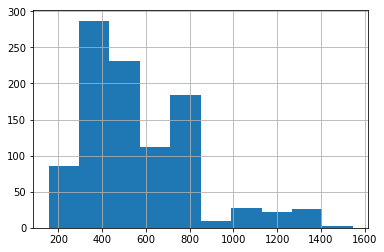

In [19]:
stop_times_aggregated['trip_id'].hist()

In [22]:
len(stop_times_aggregated)

987

In [25]:
stop_times_aggregated['total_trips'] = stop_times_aggregated['trip_id']

<h4> How to merge two datasets with the same "keys" (unique identifiers) </h4>



In [26]:
merged_stop_data = pd.concat([stop_times, stop_times_aggregated['total_trips']], axis=1, join_axes=[stop_times.stop_id])

In [27]:
merged_stop_data.head(20)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,total_trips
stop_id,,,,,,,,,,
701S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685
702S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,694
705S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670
706S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670
707S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,712
708S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670
709S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670
710S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670
711S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670
